Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [1]:
library("tidymodels")



Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.6     ✔ recipes      1.1.0
✔ dials        1.3.0     ✔ rsample      1.2.1
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.1     ✔ tidyr        1.3.1
✔ infer        1.0.7     ✔ tune         1.2.1
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.1.0
✔ purrr        1.0.2     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Use tidymodels_prefer() to resolve common conflicts.



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [2]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)

diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [3]:
glimpse(diabetes_train)



Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 1, 10, 10, 1, 8, 1, 13, 5, 5, 3, 6, 10, 4,…
$ Glucose                  <dbl> 85, 89, 115, 139, 103, 99, 97, 145, 117, 109,…
$ BloodPressure            <dbl> 66, 66, 0, 80, 30, 84, 66, 82, 92, 75, 58, 92…
$ SkinThickness            <dbl> 29, 23, 0, 0, 38, 0, 15, 19, 0, 26, 11, 0, 31…
$ Insulin                  <dbl> 0, 94, 0, 0, 83, 0, 140, 110, 0, 0, 54, 0, 0,…
$ BMI                      <dbl> 26.6, 28.1, 35.3, 27.1, 43.3, 35.4, 23.2, 22.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.167, 0.134, 1.441, 0.183, 0.388, 0.4…
$ Age                      <dbl> 31, 21, 29, 57, 33, 50, 22, 57, 38, 60, 22, 2…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

The variable "outcome" is a factorial categorical variable 

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     |  Plasma glucose concentration a 2 hours in an oral glucose tolerance test           |
| BMI         |     Body mass index (weight in kg/(height in m)^2)        |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

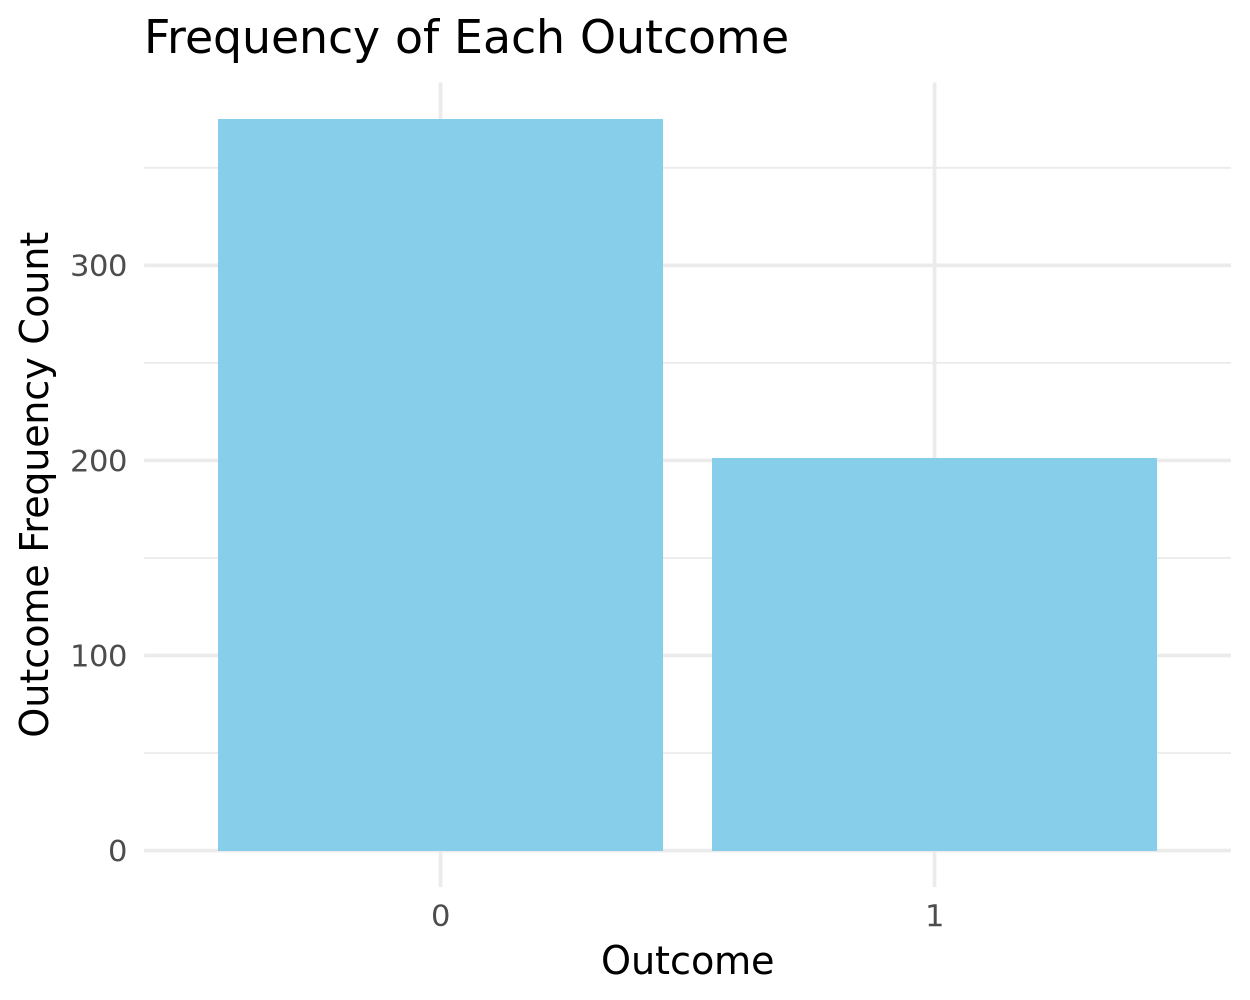

In [4]:
ggplot(diabetes_train, aes(x = Outcome)) +
  geom_bar(fill = "skyblue") +
  theme_minimal() +
  labs(title = "Frequency of Each Outcome",
       x = "Outcome",
       y = "Outcome Frequency Count")

The dataset is not balance. The dataset has a higher datapoint for 0 class.

Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [5]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,89.0
0,BMI,28.1
0,Glucose,115.0
0,BMI,35.3


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

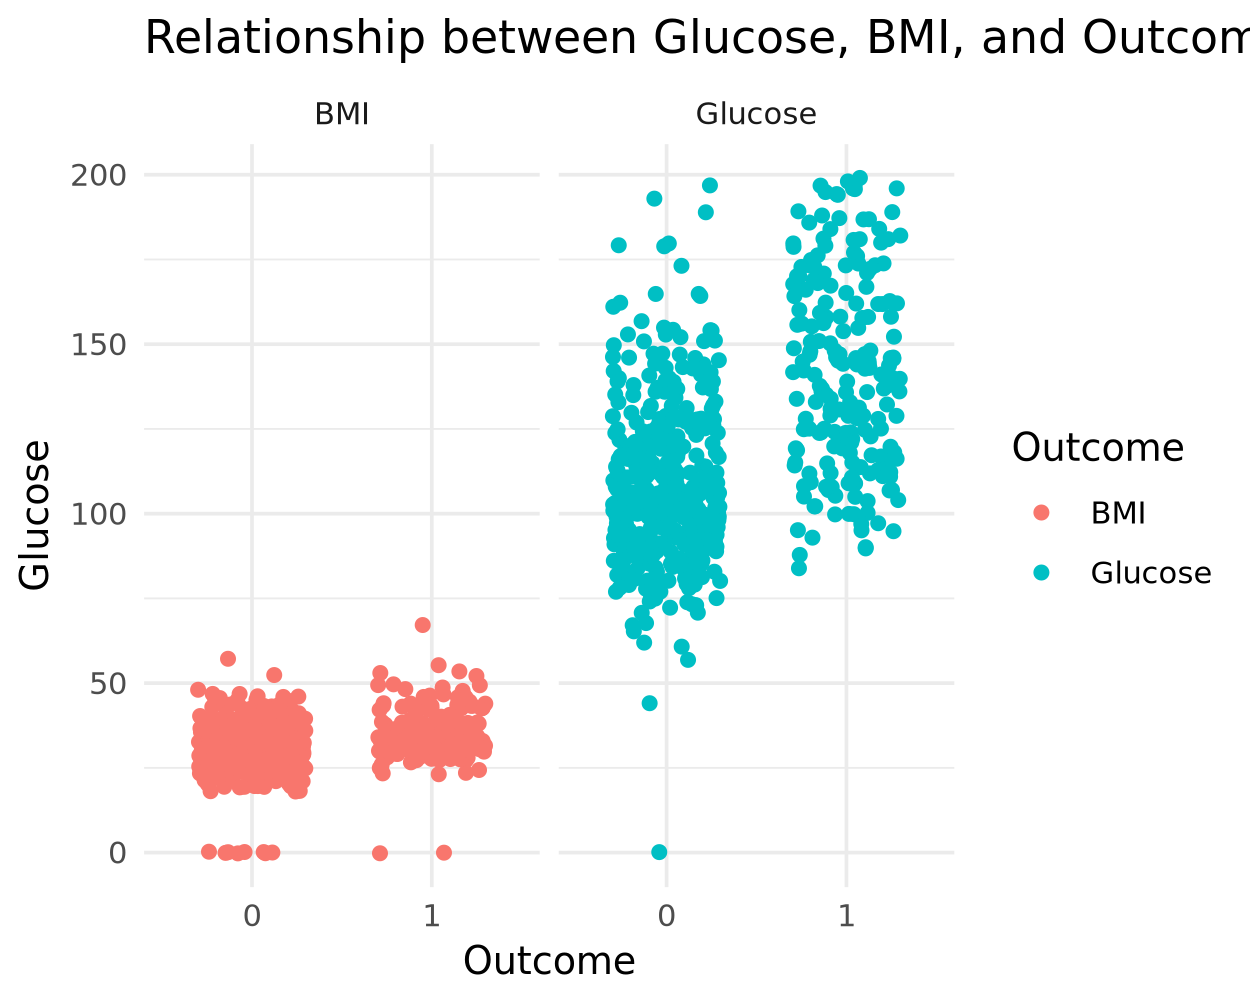

In [6]:
ggplot(plot_df, aes(x = Outcome, y = value, color = factor(name))) +
  geom_jitter(width = 0.3, height = 0.3) +
  facet_wrap(~name, ncol = 2, scales = 'free_x') +
  theme_minimal() +
  labs(title = "Relationship between Glucose, BMI, and Outcome",
       x = "Outcome",
       y = "Glucose",
       color = "Outcome")


❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

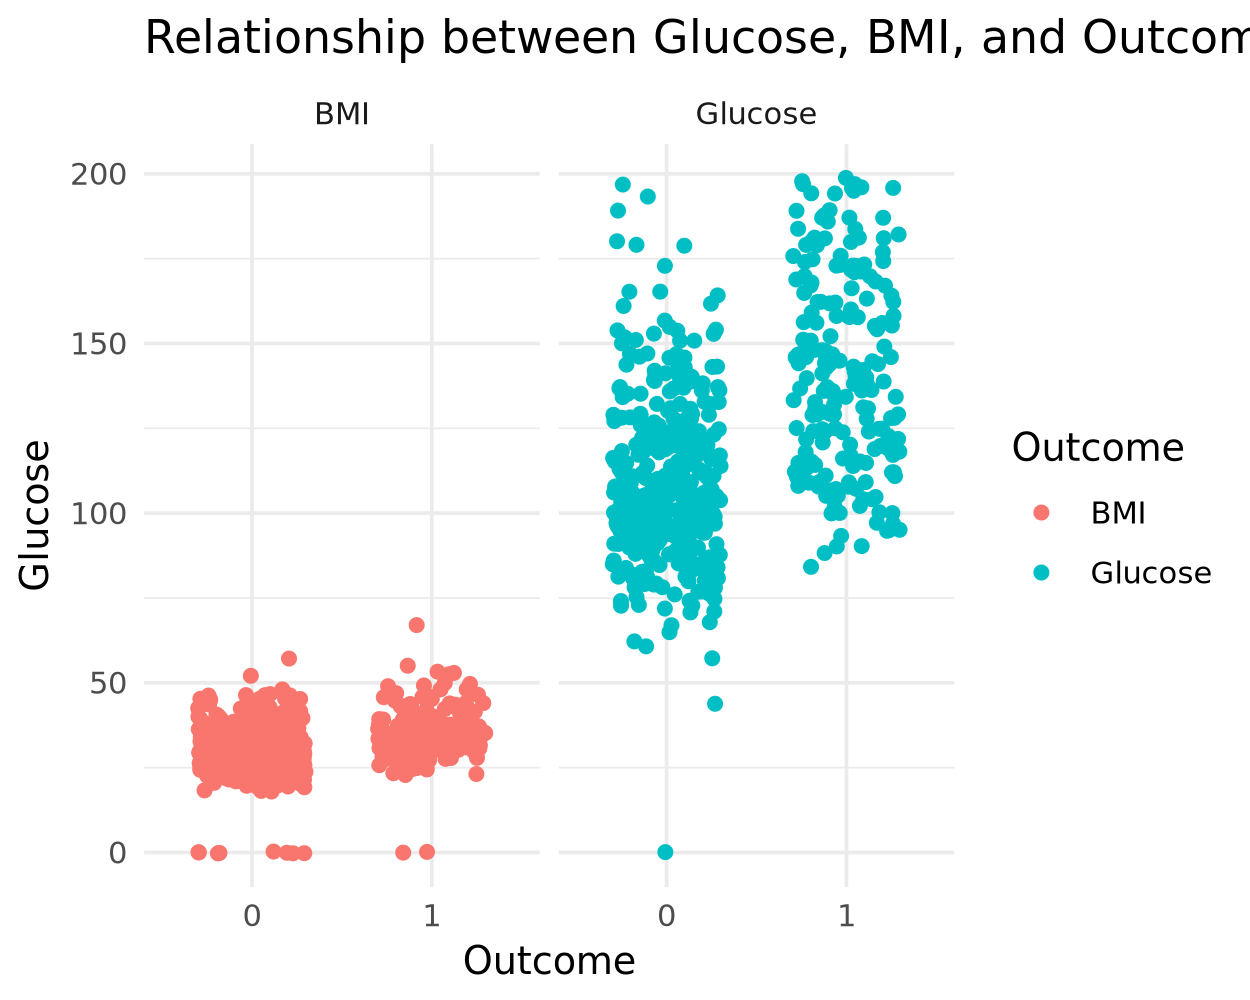

In [7]:
ggplot(plot_df, aes(x = Outcome, y = value, color = factor(name))) +
  geom_jitter(width = 0.3, height = 0.3) +
  facet_wrap(~name, ncol = 2) +
  theme_minimal() +
  labs(title = "Relationship between Glucose, BMI, and Outcome",
       x = "Outcome",
       y = "Glucose",
       color = "Outcome")

There seems to be no no change to the way the plots are display.

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [23]:
mod = logistic_reg() |> set_engine('glm')
mod_fit = mod |> fit(Outcome ~ BMI + Glucose, data = diabetes_train)



Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [24]:
diabetes_test_wPred <- augment(mod_fit, new_data = diabetes_test)



In [25]:
glimpse(diabetes_test_wPred)

Rows: 192
Columns: 12
$ .pred_class              <fct> 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, …
$ .pred_0                  <dbl> 0.23706255, 0.80550092, 0.93302723, 0.7143050…
$ .pred_1                  <dbl> 0.762937451, 0.194499077, 0.066972773, 0.2856…
$ Pregnancies              <dbl> 8, 5, 3, 4, 1, 5, 3, 10, 9, 7, 0, 7, 0, 1, 5,…
$ Glucose                  <dbl> 183, 116, 78, 110, 189, 166, 126, 125, 102, 1…
$ BloodPressure            <dbl> 64, 74, 50, 92, 60, 72, 88, 70, 76, 64, 66, 6…
$ SkinThickness            <dbl> 0, 0, 32, 0, 23, 19, 41, 26, 37, 0, 39, 32, 6…
$ Insulin                  <dbl> 0, 0, 88, 0, 846, 175, 235, 115, 0, 0, 0, 0, …
$ BMI                      <dbl> 23.3, 25.6, 31.0, 37.6, 30.1, 25.8, 39.3, 31.…
$ DiabetesPedigreeFunction <dbl> 0.672, 0.201, 0.248, 0.191, 0.398, 0.587, 0.7…
$ Age                      <dbl> 32, 30, 26, 30, 59, 51, 27, 41, 46, 40, 25, 3…
$ Outcome                  <fct> 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, …


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [27]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)
#Change the level order 1 = true, 0 = false
diabetes_test_wPred$Outcome <- factor(diabetes_test_wPred$Outcome, levels = c(1, 0))
diabetes_test_wPred$.pred_class <- factor(diabetes_test_wPred$.pred_class, levels=c(1,0))

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   1   0
         1  36  19
         0  31 106

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
A total of 67 individuals had diabetes.

- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
A total of 36 individuals were predicted to have diabetes.


- How many individuals predicted to have diabetes did not have diabetes?
A total of 19 individuals were predicted to have diabetest but did not have diabetes.
**Answer:**